In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

# Events

In [3]:
conn = utils.db_connect()

2023-07-16 23:00:35,257 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-07-16 23:00:35,259 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-07-16 23:00:35,313 INFO sqlalchemy.engine.Engine select current_schema()
2023-07-16 23:00:35,313 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-07-16 23:00:35,358 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-07-16 23:00:35,359 INFO sqlalchemy.engine.Engine [raw sql] {}


In [4]:
df_events = pd.read_sql("select * from events", conn)

2023-07-16 23:00:36,757 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 23:00:36,758 INFO sqlalchemy.engine.Engine [generated in 0.00073s] {'name': 'select * from events'}
2023-07-16 23:00:36,804 INFO sqlalchemy.engine.Engine select * from events
2023-07-16 23:00:36,805 INFO sqlalchemy.engine.Engine [raw sql] {}


In [5]:
print(min(df_events['calendar_year']))
df_events.head()


2017


,calendar_year,date,event_id,event_name,has_sg,tour,has_traditional_stats
0,2023,2023-07-09,30,John Deere Classic,yes,pga,yes
1,2023,2023-07-09,17,London,no,liv,basic
2,2023,2023-07-09,2023130,Made in HimmerLand,no,euro,no
3,2023,2023-07-09,2023312,Italian Challenge Open,no,cha,no
4,2023,2023-07-09,10046,ADT - All Thailand Partnership Trophy,no,adt,no


In [7]:
# convert has_sg and has_traditional_stats to boolean (yes = 1, no = 0)
df_events['has_sg'] = df_events['has_sg'].map({'yes': 1, 'no': 0})
df_events['has_traditional_stats'] = df_events['has_traditional_stats'].map({'yes': 1, 'no': 0})

# filter to pga and korn ferry
df_events = df_events[df_events['tour'].isin(['pga', 'kft'])]

# number of events with sg and traditional stats, by year
df_events.groupby('calendar_year').agg({'event_id':'count', 'has_sg': 'mean', 'has_traditional_stats': 'mean'})

,event_id,has_sg,has_traditional_stats
calendar_year,,,
2017,72,0.485294,0.532258
2018,73,0.478261,0.523810
2019,75,0.478873,0.540984
2020,61,0.491228,0.529412
2021,70,0.530303,0.548387
2022,72,0.514706,0.566667
2023,44,0.560976,0.578947


# Players

In [7]:
df_players = pd.read_sql("select * from players", conn)

2023-07-16 15:05:31,385 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 15:05:31,386 INFO sqlalchemy.engine.Engine [cached since 140.2s ago] {'name': 'select * from players'}
2023-07-16 15:05:31,409 INFO sqlalchemy.engine.Engine select * from players
2023-07-16 15:05:31,409 INFO sqlalchemy.engine.Engine [raw sql] {}


In [8]:
df_players.head()

,dg_id,amateur,country_code,country,name
0,14794,0,ENG,England,"Abbott, Jamie"
1,23950,0,SWE,Sweden,"Aberg, Ludvig"
2,24555,0,POR,Portugal,"Abreu, Alexandre"
3,21644,1,TUR,Turkey,"Acikalin, Leon"
4,27455,0,USA,United States,"Ackerman, Derek"


In [18]:
# number of players
df_players.shape[0]

3281

# Rankings

In [19]:
df_rankings = pd.read_sql("select * from rankings", conn)

2023-07-16 15:12:04,643 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 15:12:04,644 INFO sqlalchemy.engine.Engine [cached since 533.5s ago] {'name': 'select * from rankings'}
2023-07-16 15:12:04,668 INFO sqlalchemy.engine.Engine select * from rankings
2023-07-16 15:12:04,669 INFO sqlalchemy.engine.Engine [raw sql] {}


In [20]:
df_rankings.head()

,dg_id,player,primary_tour,amateur,country,dg_rank,dg_skill_estimate,owgr_rank,updated_at
0,18417,"Scheffler, Scottie",PGA,0,USA,1,2.780288,1,2023-07-14 03:42:28.120149
1,10091,"McIlroy, Rory",PGA,0,NIR,2,2.332767,3,2023-07-14 03:42:28.134727
2,19195,"Rahm, Jon",PGA,0,ESP,3,2.285236,2,2023-07-14 03:42:28.149505
3,15466,"Cantlay, Patrick",PGA,0,USA,4,2.191313,4,2023-07-14 03:42:28.163438
4,19895,"Schauffele, Xander",PGA,0,USA,5,2.160474,6,2023-07-14 03:42:28.177454


# Rounds

In [8]:
df_rounds = pd.read_sql("select * from rounds", conn)

2023-07-16 23:01:00,327 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 23:01:00,328 INFO sqlalchemy.engine.Engine [cached since 23.57s ago] {'name': 'select * from rounds'}
2023-07-16 23:01:00,353 INFO sqlalchemy.engine.Engine select * from rounds
2023-07-16 23:01:00,353 INFO sqlalchemy.engine.Engine [raw sql] {}


In [13]:
# print the first 5 rows and make all columns visible without scrolling
pd.set_option('display.max_columns', None)
df_rounds.head()

,tour,year,season,event_name,event_id,player_name,dg_id,fin_text,round_num,course_name,course_num,course_par,start_hole,teetime,round_score,sg_putt,sg_arg,sg_app,sg_off_tee,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,pga,2023,2023,John Deere Classic,30,"Straka, Sepp",17511,1,1,TPC Deere Run,669,71,1,12:54pm,73,-2.919,-0.672,-0.145,0.916,0.098,-2.821,299.6,0.643,0.833,0.167,49.889,30.646,1.0,4.0
1,pga,2023,2023,John Deere Classic,30,"Straka, Sepp",17511,1,2,TPC Deere Run,669,71,10,7:29am,63,2.094,1.560,1.493,1.188,4.241,6.335,295.0,0.786,0.889,1.000,60.667,20.788,6.0,2.0
2,pga,2023,2023,John Deere Classic,30,"Straka, Sepp",17511,1,3,TPC Deere Run,669,71,1,10:05am,65,2.933,-0.613,1.169,0.164,0.719,3.652,295.9,0.786,0.778,0.800,0.000,23.437,6.0,2.0
3,pga,2023,2023,John Deere Classic,30,"Straka, Sepp",17511,1,4,TPC Deere Run,669,71,1,11:40am,62,4.671,0.410,0.896,1.023,2.329,7.000,301.4,0.786,0.889,0.667,37.516,23.448,6.0,1.0
4,pga,2023,2023,John Deere Classic,30,"Todd, Brendon",12425,T2,1,TPC Deere Run,669,71,1,7:29am,66,2.566,1.104,0.040,0.470,1.613,4.179,284.0,0.929,0.778,1.000,49.614,25.852,2.0,2.0


array([[<AxesSubplot:title={'center':'sg_putt'}>,
        <AxesSubplot:title={'center':'sg_arg'}>],
       [<AxesSubplot:title={'center':'sg_app'}>,
        <AxesSubplot:title={'center':'sg_off_tee'}>],
       [<AxesSubplot:title={'center':'sg_t2g'}>,
        <AxesSubplot:title={'center':'sg_total'}>]], dtype=object)

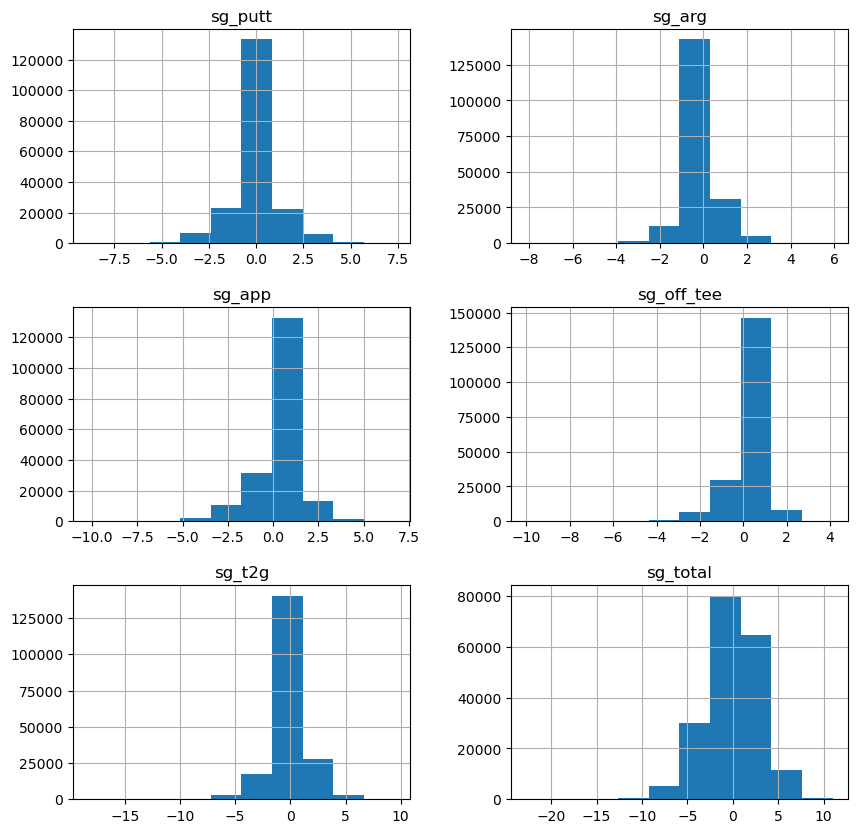

In [10]:
# distribution of strokes gained columns
df_rounds[['sg_putt', 'sg_arg', 'sg_app', 'sg_off_tee', 'sg_t2g', 'sg_total']].hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'driving_acc'}>,
        <AxesSubplot:title={'center':'driving_dist'}>],
       [<AxesSubplot:title={'center':'gir'}>,
        <AxesSubplot:title={'center':'scrambling'}>],
       [<AxesSubplot:title={'center':'round_score'}>, <AxesSubplot:>]],
      dtype=object)

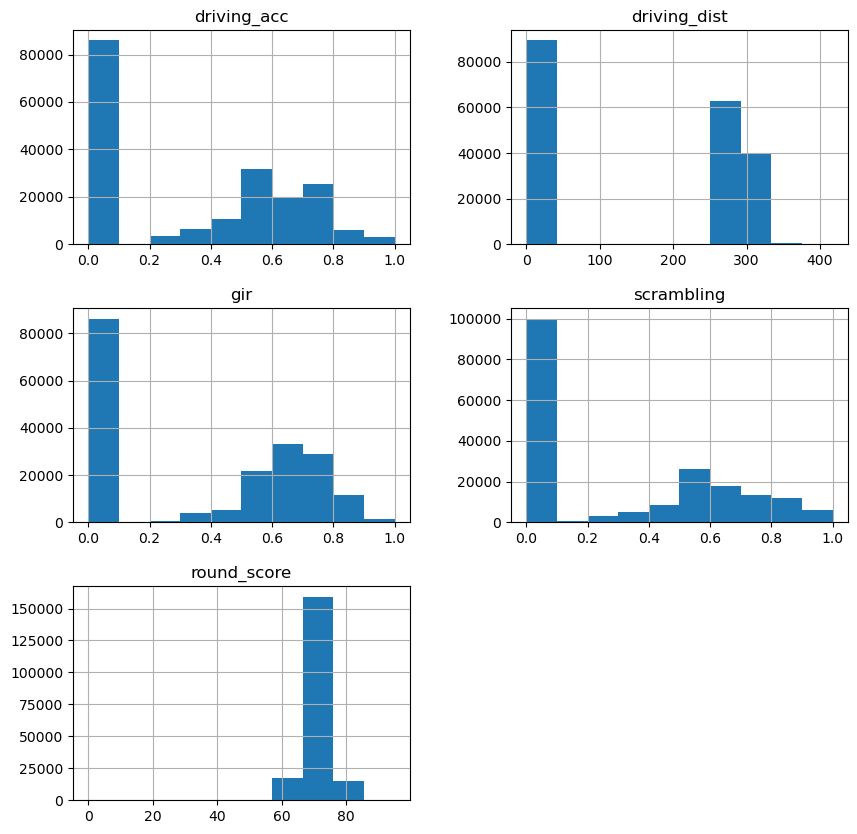

In [11]:
df_rounds[['driving_acc', 'driving_dist', 'gir', 'scrambling', 'round_score']].hist(figsize=(10,10))

In [ ]:
# aggregate strokes gained by player and season, including count of rounds
df_rounds_agg = df_rounds.groupby(['dg_id', 'season']).agg({'sg_off_tee': 'mean', 'sg_putt': 'mean', 'sg_arg': 'mean', 'sg_app': 'mean', 'sg_t2g':'mean', 'sg_total': 'mean'}).reset_index()

In [12]:
# filter for dg_id = 1804
df_rounds[df_rounds['dg_id'] == 1804]

,tour,year,season,event_name,event_id,player_name,dg_id,fin_text,round_num,course_name,course_num,course_par,start_hole,teetime,round_score,sg_putt,sg_arg,sg_app,sg_off_tee,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
4455,pga,2023,2023,the Memorial Tournament presented by Workday,23,"Choi, K.J.",1804,CUT,1,Muirfield Village Golf Club,23,72,10,12:24pm,81,-2.010,-2.036,-1.241,-1.713,-4.990,-7.000,264.5,0.571,0.222,0.588,47.571,31.192,2.0,9.0
4456,pga,2023,2023,the Memorial Tournament presented by Workday,23,"Choi, K.J.",1804,CUT,2,Muirfield Village Golf Club,23,72,1,7:24am,75,-3.431,1.837,2.420,-2.877,1.380,-2.051,259.5,0.571,0.444,0.667,204.079,29.107,5.0,10.0
13379,pga,2023,2023,Puerto Rico Open,483,"Choi, K.J.",1804,CUT,1,Grand Reserve Golf Club,742,72,1,7:32am,75,0.000,0.000,0.000,0.000,0.000,-3.225,266.0,0.714,0.500,0.000,0.000,0.000,0.0,0.0
13380,pga,2023,2023,Puerto Rico Open,483,"Choi, K.J.",1804,CUT,2,Grand Reserve Golf Club,742,72,10,12:02pm,72,0.000,0.000,0.000,0.000,0.000,-0.636,270.0,0.429,0.611,0.000,0.000,0.000,0.0,0.0
18575,pga,2023,2023,Sony Open in Hawaii,6,"Choi, K.J.",1804,CUT,1,Waialae Country Club,6,70,1,7:30am,66,1.732,0.656,0.555,0.523,1.732,3.465,276.2,0.786,0.778,0.800,59.944,28.259,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190185,pga,2017,2017,Waste Management Phoenix Open,3,"Choi, K.J.",1804,CUT,2,TPC Scottsdale,510,71,1,12:34pm,71,-1.499,0.939,0.582,-0.907,0.615,-0.885,284.1,0.643,0.667,0.571,33.983,30.026,4.0,6.0
190636,pga,2017,2017,Farmers Insurance Open,4,"Choi, K.J.",1804,CUT,1,Torrey Pines (North),104,72,1,10:30am,72,0.000,0.000,0.000,0.000,0.000,-1.244,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0
190637,pga,2017,2017,Farmers Insurance Open,4,"Choi, K.J.",1804,CUT,2,Torrey Pines GC (South),4,72,10,9:20am,76,0.931,-1.646,-0.311,-0.960,-2.918,-1.987,265.6,0.571,0.611,0.571,133.432,40.255,2.0,9.0
192088,pga,2017,2017,Sony Open in Hawaii,6,"Choi, K.J.",1804,CUT,1,Waialae CC,6,70,1,12:10pm,70,-2.546,-0.499,0.298,0.996,0.796,-1.750,292.0,0.571,0.833,0.250,122.922,25.496,0.0,3.0


# ESPN BIO

In [31]:
df_espn_bio = pd.read_sql("select * from espn_bio", conn)

2023-07-16 15:27:31,313 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 15:27:31,314 INFO sqlalchemy.engine.Engine [cached since 1460s ago] {'name': 'select * from espn_bio'}
2023-07-16 15:27:31,337 INFO sqlalchemy.engine.Engine select * from espn_bio
2023-07-16 15:27:31,338 INFO sqlalchemy.engine.Engine [raw sql] {}


In [32]:
df_espn_bio.head()

,birthdate,birthplace,college,swing,turned_pro,href,espn_id
0,7/27/1993,"Dallas, Texas",Texas,Right,2012,https://www.espn.com/golf/player/_/id/5467/jor...,5467
1,11/12/1987,"Beaudesert, Queensland",None,Right,2006,https://www.espn.com/golf/player/_/id/1680/jas...,1680
2,11/5/1978,"Bagdad, Florida",Georgia,Right,None,https://www.espn.com/golf/player/_/id/780/bubb...,780
3,12/13/1988,"Anaheim, California",Oklahoma State,Right,2009,https://www.espn.com/golf/player/_/id/3702/ric...,3702
4,6/22/1984,"Columbia, South Carolina",Coastal Carolina,Right,2007,https://www.espn.com/golf/player/_/id/3448/dus...,3448


# ESPN Stats

In [33]:
df_espn_stats = pd.read_sql("select * from espn_stats", conn)

2023-07-16 15:30:58,813 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 15:30:58,814 INFO sqlalchemy.engine.Engine [cached since 1668s ago] {'name': 'select * from espn_stats'}
2023-07-16 15:30:58,840 INFO sqlalchemy.engine.Engine select * from espn_stats
2023-07-16 15:30:58,841 INFO sqlalchemy.engine.Engine [raw sql] {}


In [34]:
df_espn_stats.head()

,rk,name,age,earnings,cup,evnts,rnds,cuts,top10,wins,score,ddis,dacc,gir,putts,sand,birds,season,espn_id
0,1,Jordan Spieth,29,12030465.0,6392,26,92,22,16,6,68.9,291.8,62.9,64.9,1.699,58.1,4.620,2015,5467
1,2,Jason Day,35,9403330.0,6970,21,76,19,12,5,68.9,313.7,55.9,67.1,1.712,61.1,4.711,2015,1680
2,3,Bubba Watson,44,6876797.0,4009,20,72,18,10,2,69.3,315.2,56.6,64.5,1.756,46.9,4.278,2015,780
3,4,Rickie Fowler,34,5773430.0,4196,22,76,18,8,2,70.3,296.8,62.1,61.5,1.734,55.8,4.053,2015,3702
4,5,Dustin Johnson,39,5509467.0,2854,21,73,18,11,1,68.9,317.7,55.5,67.1,1.715,38.6,4.164,2015,3448


# Earnings

In [35]:
df_earnings = pd.read_sql("select * from earnings", conn)

2023-07-16 15:34:04,405 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-16 15:34:04,406 INFO sqlalchemy.engine.Engine [cached since 1853s ago] {'name': 'select * from earnings'}
2023-07-16 15:34:04,434 INFO sqlalchemy.engine.Engine select * from earnings
2023-07-16 15:34:04,435 INFO sqlalchemy.engine.Engine [raw sql] {}


In [36]:
df_earnings.head()

,Rank,Player,Money,Tournament,Season
0,1,Sepp Straka,1332000,John Deere Classic,2022-2023
1,2,Alex Smalley,658600,John Deere Classic,2022-2023
2,2,Brendon Todd,658600,John Deere Classic,2022-2023
3,4,Ludvig Aberg,333000,John Deere Classic,2022-2023
4,4,Adam Schenk,333000,John Deere Classic,2022-2023
